In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
import skdsp.signal.continuous as cs
import skdsp.signal.printer as pt
import numpy as np
import sympy as sp
import scipy.signal as cp
from ipywidgets import interact, fixed
np.seterr(all='ignore')
PI = sp.S.Pi
pi = np.pi

## 1.- Básicas

In [2]:
# basic signals
def s1(signal='delta', flip_delay='just delay', width=16, delay=0):
    npts = 128
    ex = []
    ey = []
    if signal == 'delta':
        s = cs.Delta()
        ex = [0, 0, -0.25, 0, 0.25, 0]
        ey = [0, 1,  0.95, 1, 0.95, 1]
        max_ = 1
        min_ = 0
    elif signal == 'step':
        s = cs.Step()
        ex = [0, 0]
        ey = [0, 1]
        max_ = 1
        min_ = 0
    elif signal == 'ramp':
        s = cs.Ramp()
        max_ = npts
        min_ = 0
    elif signal == 'rect':
        s = cs.Rect(width)
        max_ = 1
        min_ = 0
    elif signal == 'triang':
        s = cs.Triang(width)
        max_ = 1
        min_ = 0
    elif signal == 'sin':
        s = cs.Sine(width)
        max_ = 1
        min_ = -1
    elif signal == 'cos':
        s = cs.Cosine(width)
        max_ = 1
        min_ = -1
    ex = np.array(ex)    
    if flip_delay == 'flip then delay':
        s = s.flip().delay(delay)
        ex = ex + delay
    elif flip_delay == 'delay then flip':
        s = s.delay(delay).flip()
        ex = ex - delay
    elif flip_delay == 'just delay':
        s = s.delay(delay)
        ex = ex + delay
    ns = np.arange(-npts, npts+1, 2**(-3))
    ys = s[ns]
    plt.figure(figsize=(12, 4))
    plt.plot(ns, ys, 'b-', lw=3)
    plt.plot(ex, ey, 'b-', lw=3)
    plt.xlim([-npts, npts])
    range_ = (max_ - min_)*0.1
    plt.ylim([min_-range_, max_+range_])
    plt.axvline(0, color='k')
    plt.axhline(0, color='k')
    plt.title(pt.latex(s, mode='inline'), size=24)
    plt.grid(True)

<IPython.core.display.Javascript object>


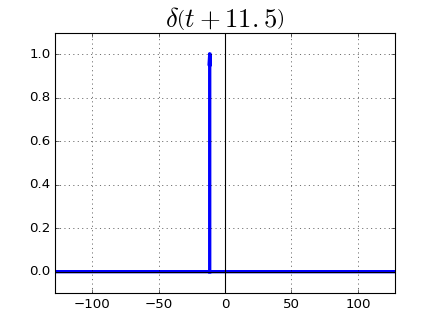

In [3]:
interact(s1, signal=('delta', 'step', 'ramp', 'rect', 'triang', 'sin', 'cos'),
         flip_delay=('just delay', 'flip then delay', 'delay then flip'),
         width=(1, 30, 0.25), delay=(-15, 15, 0.25));

<IPython.core.display.Javascript object>


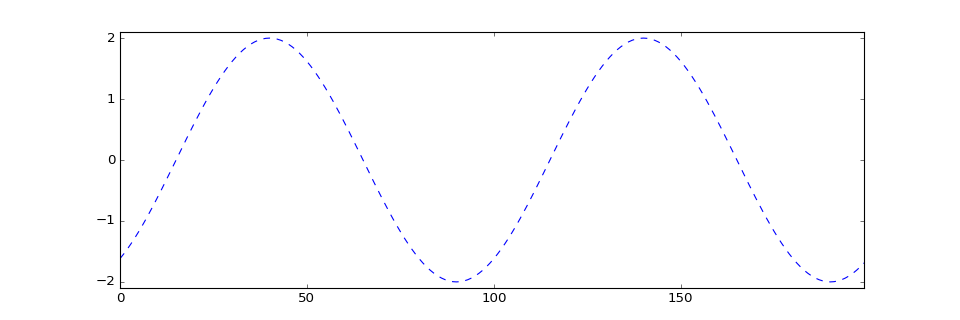

In [15]:
# Sinusoid generator
f0 = 100
step = 1e-4
size = 200
x = cs.Sinusoid(2, 2*PI*f0).generate(0, step, size, overlap=(size-10)*step)
def trozo():
    trozo = next(x)
    plt.figure(figsize=(12, 4))
    plt.plot(trozo, '--')
    plt.axis([0, 199, -2.1, 2.1])
interact(trozo, __manual=True)